## Hausarbeit - Abgabe 2

### Laden der nötigen Bibliotheken

In [1]:
import torch
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided
from PIL import Image
from torchvision import transforms

### 1. Aufgabe:
Erstellen Sie einen 10x10 Tensor in dem die Werte zeilenweise kontinuierlich um 1 erhöht werden (zeilenweise).

In [29]:
# 10x10 Tensor gefüllt mit einsen
a_new = torch.tensor(np.arange(0,100).reshape((10,10)))
print(a_new)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], dtype=torch.int32)


### 2. Aufgabe:
Erstellen Sie die Transponierte des Tensors, vergewissern Sie sich, dass das 
neue Tensorobjekt auf die ursprünglichen Daten zeigt

In [3]:
# Transponieren des Tensors:
a_t = a_new.t()
print(a_t)

# Sicherstellen, dass die beiden Tensoren den gleichen Speicher besitzen: 
print('Storage of a:', id(a_new.storage()))
print('Storage of a transposed:', id(a_t.storage()))
print('Storage-Function:', id(a_new.storage()) == id(a_t.storage()))

# Ohne Fehlermeldung:
#print('Storage of a:', id(a_new.untyped_storage()))
#print('Storage of a transposed:', id(a_t.untyped_storage()))
#print('Untyped-Storage-Function:',id(a_new.untyped_storage()) == id(a_t.untyped_storage()))

tensor([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
        [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
        [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
        [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
        [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
        [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
        [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
        [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
        [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
        [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]], dtype=torch.int32)
Storage of a: 1377183956512
Storage of a transposed: 1377367931680
Storage-Function: False


C:\Users\laura\AppData\Local\Temp\ipykernel_16760\867624466.py:6: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print('Storage of a:', id(a_new.storage()))
C:\Users\laura\AppData\Local\Temp\ipykernel_16760\867624466.py:7: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print('Storage of a transposed:', id(a_t.storage()))
C:\Users\laura\AppData\Local\Temp\ipykernel_16760\867624466.py:8: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This s

### 3. Aufgabe:
Erstellen Sie eine 9x9 Untermatrix, indem Sie die erste Zeile und Spalte streichen. Was ist nun der stride, size und offset des neuen Tensorobjekts?

In [4]:
# Erstellen der 9x9 Untermatrix
b = a_new[1:,1:]

print('9x9 Untermatrix:', b)
print('Stride (9x9 Untermatrix):', b.stride())          #  Gibt an wie viele Elemente im Speicher zwischen aufeinanderfolgenden Elemten in jeder Dimension liegen. 
print('Size (9x9 Untermatrix):', b.size())              #  Größe des Tensors. Anzahl der Elemente in jeder Dimension
print('Offset (9x9 Untermatrix):', b.storage_offset())  #  Angabe wo sich das erste Element des Tensors im Speicher im Vergleich zum Anfang des Anfangs des Speichers befindet.
                                                        #  Hier befindet sich der Offset bei 11, da die erste Zeile und Spalte entfernt wurde. 

# Daten der Ursprungsmatrix
#print(a_new)
#print('Storage (10x10 Matrix):', a_new.storage())
#print('Offset (10x10 Matrix):', a_new.storage_offset())
#print('Stride (10x10 Matrix):', a_new.stride())
#print('Size (10x10 Matrix):', a_new.size())

9x9 Untermatrix: tensor([[11, 12, 13, 14, 15, 16, 17, 18, 19],
        [21, 22, 23, 24, 25, 26, 27, 28, 29],
        [31, 32, 33, 34, 35, 36, 37, 38, 39],
        [41, 42, 43, 44, 45, 46, 47, 48, 49],
        [51, 52, 53, 54, 55, 56, 57, 58, 59],
        [61, 62, 63, 64, 65, 66, 67, 68, 69],
        [71, 72, 73, 74, 75, 76, 77, 78, 79],
        [81, 82, 83, 84, 85, 86, 87, 88, 89],
        [91, 92, 93, 94, 95, 96, 97, 98, 99]], dtype=torch.int32)
Stride (9x9 Untermatrix): (10, 1)
Size (9x9 Untermatrix): torch.Size([9, 9])
Offset (9x9 Untermatrix): 11


### 4. Aufgabe:
Berechnen Sie die inverse einer 10x10 Matrix mit vollem Rang mit torch.inverse und multiplizieren sie diese mit der Ausgangsmatrix. 
Verifizieren Sie dass das Ergebnis die Einheitsmatrix ergibt.

In [30]:
# Ausgangsmatrix (10x10 Matrix):
input = torch.randn(10,10)

# Berechnung der inversen Matrix:
input_inverse = torch.inverse(input)

# Multiplikation der inversen Matrix mit der Ausgangsmatrix:
output = input @ input_inverse
output = torch.abs(torch.round(output, decimals=4))
print('Ergebnis der Multiplikation der Matrix und der Inversen (A*A^-1):', output)

# Einheitsmatrix: 
Einheitsmatrix = torch.eye(10)

# Verifizierung des Ergebnisses:
print(Einheitsmatrix == output)

# Verifizierung des Ergebnisses über Vergleich der Werte der Einheitsmatrix und des Output-Vektors.
ture_einheitsmatrix = True

# Schleife über die 10x10 Matrix des Outputs.
for i in range(len(output)):
    for j in range(len(output[i])):
        # Wenn einer der Werte der Matrix nicht eins oder null ist bricht die Schleife ab und der Wert wird auf False gesetzt.
        # Ist dies der Fall sind die Kriterien für die Einheitsmatrix vom Output nicht erfüllt. 
        if i == j:  
            if output[i][j] != 1: # Auf der Diganonalen der Einheitsmatrix sollen nur Einsen stehen. 
                ture_einheitsmatrix = False
                break
        else:
            if output[i][j] != 0: # Auf den restlichen Postionen der Einheitsmatrix sollen nur Nullen stehen. 
                ture_einheitsmatrix = False
                break

# Ausgabe der Verifizierung
if ture_einheitsmatrix:
    print("Das Ergebnis der Multiplikation ist die Einheitsmatrix")
else:
    print("Das Ergebnis der Multiplikation ist nicht die Einheitsmatrix")

Ergebnis der Multiplikation der Matrix und der Inversen (A*A^-1): tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True],
        [True

### 5. Aufgabe: 
Stellen Sie aus dem Bild cat.jpg einen Ausschnitt dar, indem Sie die Funktion as_strided verwenden. Der dargestellte Ausschnitt soll um den Faktor 2 niedriger aufgelöst sein.

Shape Original: torch.Size([135, 135, 3])
Stride Original: (275, 1, 50325)
Shape new Image: torch.Size([67, 67, 3])
Stride new Image: (550, 2, 50325)


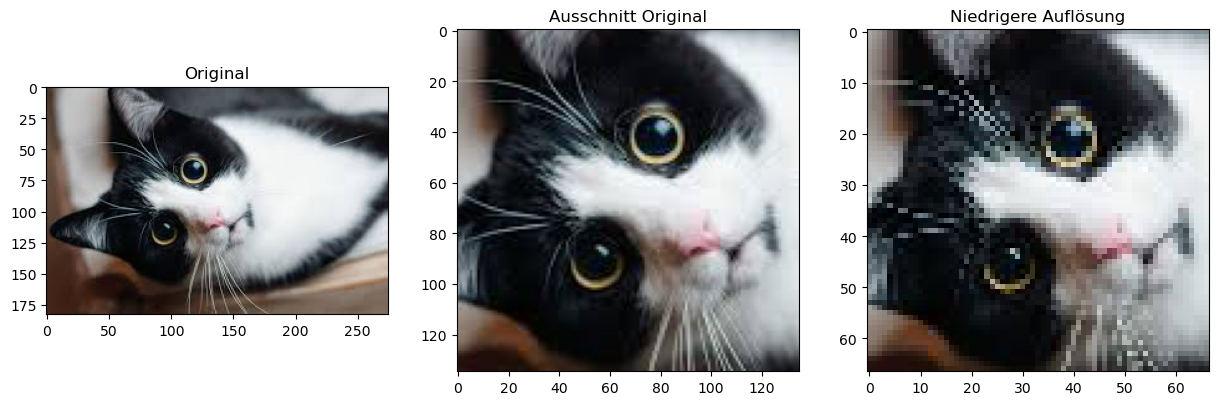

In [31]:
# Öffnen des Katzenbilds
image = Image.open("cat.jpeg")

# Durchführung des Preprocessings
preprocess = transforms.ToTensor()
image_cat = preprocess(image).permute(1,2,0)

# Definieren eines Ausschnitts aus dem Katzenbild
image_ausschnitt = image_cat[25:160, 40:175, :]

# Verwendung der Funktion torch.as_strided für die Darstellung des Ausschnitts in niedrigerer Auflösung (Faktor 2 kleiner)
image_lower_resulution = torch.as_strided(image_ausschnitt, size=(image_ausschnitt.shape[0]//2, image_ausschnitt.shape[1]//2, image_ausschnitt.shape[2]), 
                                          stride=(image_ausschnitt.stride(0)*2, image_ausschnitt.stride(1)*2, image_ausschnitt.stride(2)))

# Vergleich der shape- und stride- Werte für das originale und das bearbeitete Bild.
### Original ###
shape = image_ausschnitt.shape
stride = image_ausschnitt.stride()
print('Shape Original:', shape)
print('Stride Original:', stride)

### New Image ###
new_shape = image_lower_resulution.shape
new_stride = image_lower_resulution.stride()
print('Shape new Image:', new_shape)
print('Stride new Image:', new_stride)

# Plotten des Ergebnisses
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].imshow(image)
axs[0].set_title("Original")
axs[1].imshow(image_ausschnitt)
axs[1].set_title("Ausschnitt Original")
axs[2].imshow(image_lower_resulution)
axs[2].set_title("Niedrigere Auflösung")
plt.show()
